<a href="https://colab.research.google.com/github/MorozovDesu/DataAnalysis_methods/blob/main/LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Вариант* 1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
#
#
#
#
#

In [ ]:
N=2
D=5
X, y = make_blobs(n_samples=100, centers=N, n_features=D, random_state=None, cluster_std=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
df=pd.DataFrame(X_train)
df['Class']=y_train


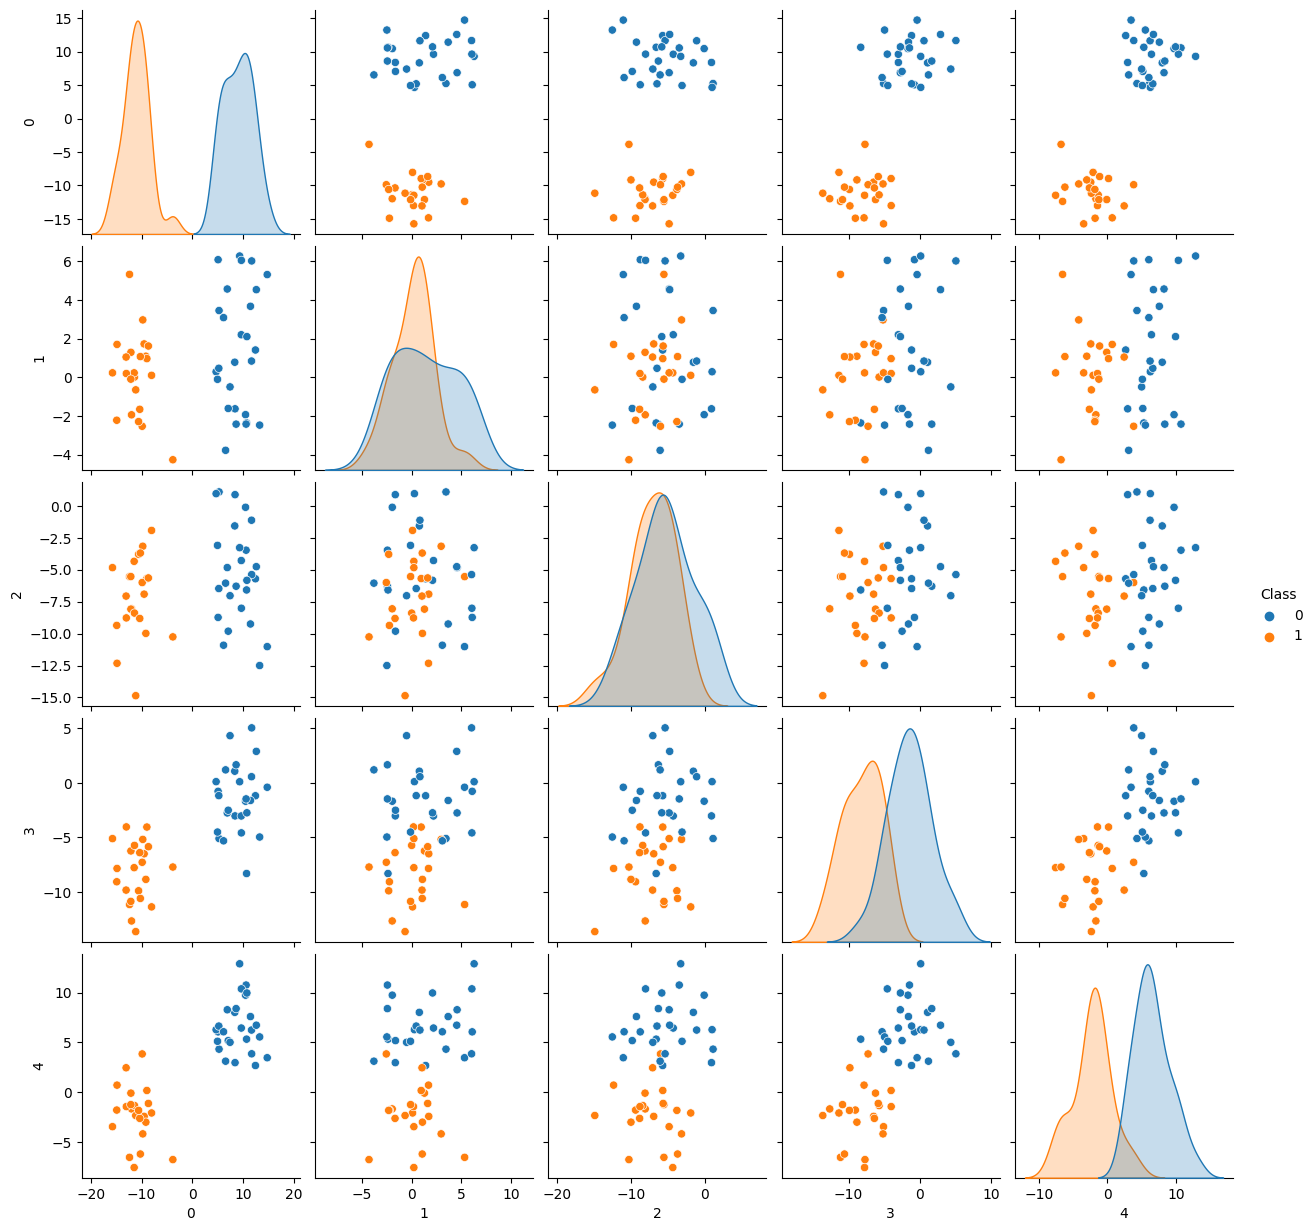

In [ ]:
#Построим диаграммы рассеяния
sns.pairplot(df, hue='Class') 

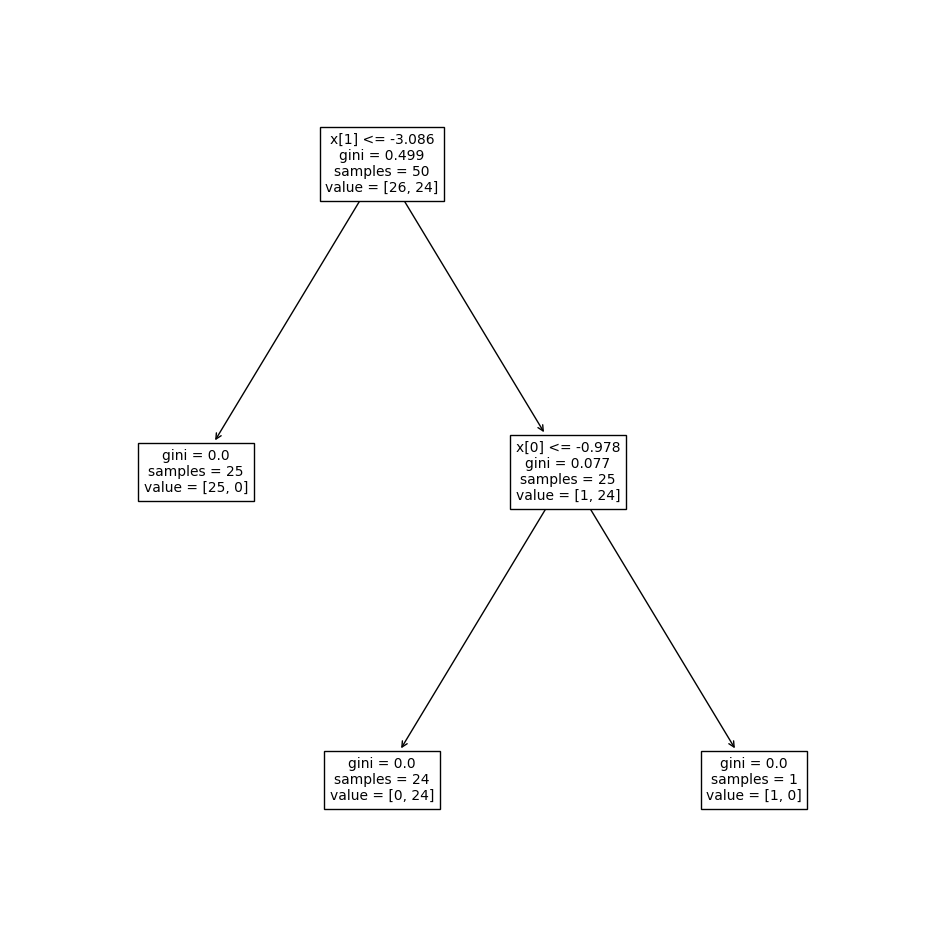

In [ ]:
#Обучим дерево решений
# в случае, если точность модели менее 0,9, изменяя значение параметров
# criterion, max_depth, min_samples_split, min_samples_leaf попытаться ее повысить
model=tree.DecisionTreeClassifier(criterion="gini", min_samples_split=12, max_depth=5)
model.fit(X_train,y_train)

#Выведем дерево решений:
plt.figure(figsize=(12,12))  
tree.plot_tree(model, fontsize=10)
plt.show()


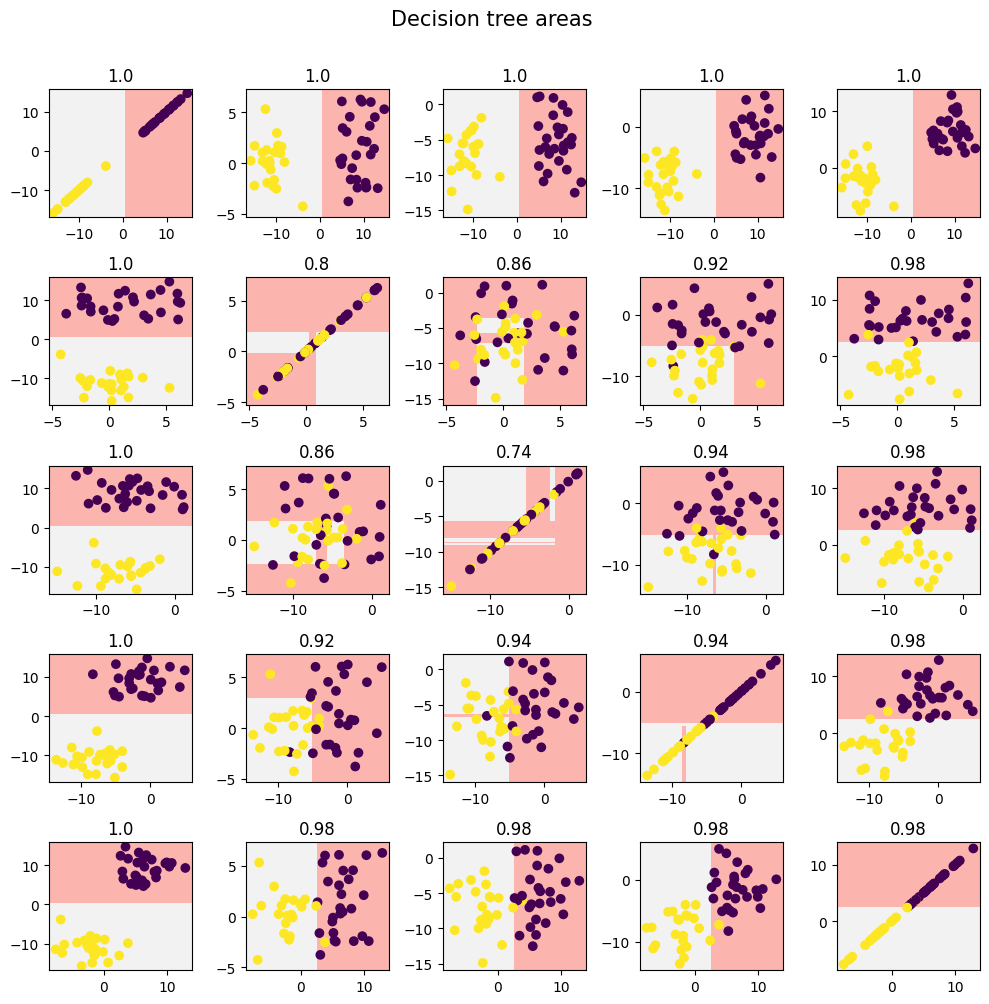

In [ ]:
#Немного модифицируем и используем  функцию отрисовки решающих поверхностей из л.р. 3
#построим и выведем на экран деревья решений и решающие поверхности для каждой пары признаков
def DT(field1, field2, k):
    splot=plt.subplot(D,D,k)
    x=df[[field1, field2]].values #определим данные
    df['Class']=y_train #определим результирующий признак
    model_pair=tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10, max_depth=5)    
    model_pair.fit(x,y_train)
    #определим минимальные и максимальные значения в данных для большей информативности диаграмм
    min1, max1 = df[field1].min()-1, df[field1].max()+1
    min2, max2 = df[field2].min()-1, df[field2].max()+1
    #определим все строки и столбцы области отрисовки
    X = np.linspace(min1, max1, 200) 
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)
    #определим значения "решающих поверхностей"
    ZZ = np.array([model_pair.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    #отрисуем поверхности и данные
    plt.pcolormesh(X, Y, Z,cmap='Pastel1')
    #Выведем значения
    plt.scatter(df[field1],df[field2],c=y_train)
    #оценка точности модели
    plt.title(model_pair.score(x,y_train)) 
    return splot

plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Decision tree areas ',y=1, fontsize=15)
k=0
for i in range(D):
    for j in range (D):
        k=k+1 
        splot=DT(i, j, k) 
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [ ]:
#Оценим точность модели на тестирующей выборке:
model.score(X_test,y_test)

0.96

In [30]:
from sklearn.metrics import confusion_matrix
# Получение предсказаний для обучающей выборки
y_pred = model.predict(X_train)
# Получение конфьюжн матрицы
cm = confusion_matrix(y_train, y_pred)
# Вывод конфьюжн матрицы в виде таблицы
print('Confusion matrix для обучающей выборки:')
print(cm)

# Оценка точности модели на обучающей выборке
score = model.score(X_train, y_train)
print("Accuracy для обучающей выборки: {:.2f}%".format(score * 100))


Confusion matrix для обучающей выборки:
[[26  0]
 [ 0 24]]
Accuracy для обучающей выборки: 100.00%


In [28]:
from sklearn.metrics import confusion_matrix
# Получение предсказаний для тестовой выборки
y_pred_test = model.predict(X_test)
# Получение конфьюжн матрицы
cm_test = confusion_matrix(y_test, y_pred_test)
# Вывод конфьюжн матрицы в виде таблицы
print('Confusion matrix для тестовой выборки:')
print(cm_test)

# Оценка точности модели на тестовой выборке
score = model.score(X_test, y_test)
print("Accuracy для тестовой выборки: {:.2f}%".format(score * 100))


Confusion matrix для тестовой выборки:
[[24  0]
 [ 2 24]]
Accuracy для тестовой выборки: 96.00%


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Создание и обучение модели случайного леса из 100 деревьев
model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

# Оценка точности модели на тестовой выборке
score = model.score(X_test, y_test)
print("Accuracy on test set: {:.2f}%".format(score * 100))


Accuracy on test set: 96.00%


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_features='sqrt')
model.fit(X_train, y_train)
rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)

fi = pd.DataFrame({'feature': list(df.columns[:-1]), 'importance': model.feature_importances_})\
                    .sort_values('importance', ascending=False)

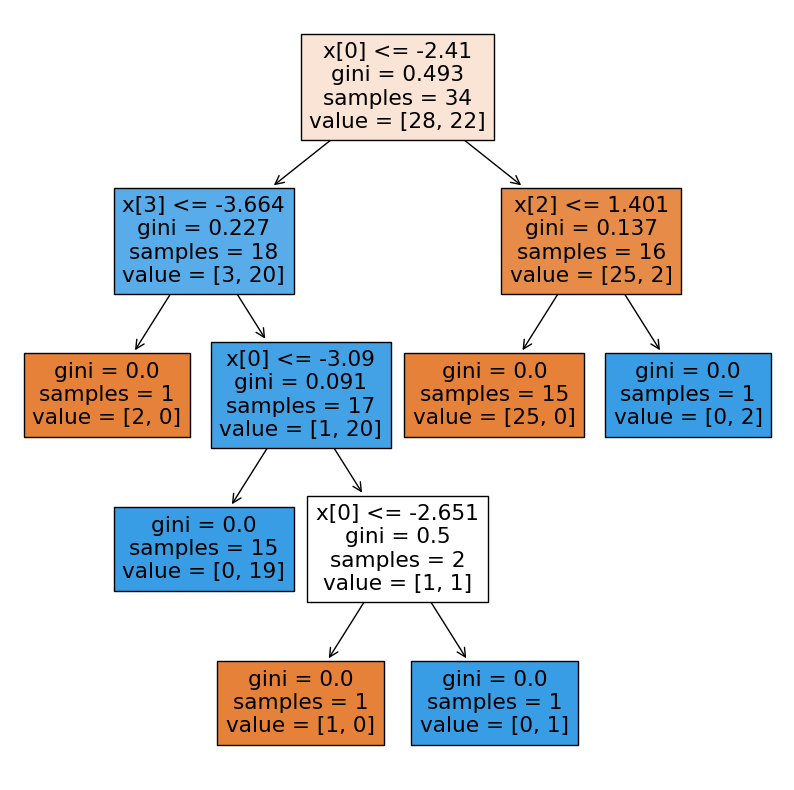

In [60]:
tree = model.estimators_[0]
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

# Отображаем структуру дерева
plt.figure(figsize=(10,10))
plot_tree(tree, filled=True)
plt.show()